SAE : Analyse de données

Introduction : Liste de nos fonctions
Il faut éxécuter ce code pour faire fonctionner les codes d'analyse

In [30]:
%pip install mplcursors

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from math import *
import json, mplcursors
import matplotlib.pyplot as plot

#fonction pour faire la moyenne d'un tableau
def moyenne(t):
    moyenne=0
    for i in range(len(t)):
        moyenne+=t[i]
    return moyenne/len(t)

#fonction pour faire la variance d'un tableau en réutilisant la fonction moyenne
def variance(t):
    moy = moyenne(t)
    var = 0
    for i in range (len(t)):
        var+=(t[i]-moy)**2
    return var/len(t)

#fonction pour faire l'écart type d'un tableau en réutilisant la fonction variance
def ecarttype (t):
    return sqrt(variance(t))

#fonction pour faire la covariance entre deux tableauxen réutilisant la fonction moyenne
def covariance(t1,t2):
    cov=0
    moy1=moyenne(t1)
    moy2=moyenne(t2)
    for i in range (len(t1)):
        cov+=(t1[i]-moy1)*(t2[i]-moy2)
    return cov/len(t1)

#fonction pour faire la corrélation entre deux tableaux en réutilisant les fonctions covariance et variance
def correlation(t1,t2):
    varian=variance(t1)*variance(t2)
    ecart=sqrt(varian)
    corre=abs(covariance(t1,t2)/ecart)
    return corre


#fonction pour faire une courbe de suivi d'une donnée
def courbe(x,y,nom):
    plot.plot(x,y)
    plot.xlabel('Temps')
    plot.ylabel(nom)  
    plot.show()

def pourcentage (t,tot):
    tab=[]
    for i in range (len(t)):
        tab.append(round((t[i]/tot*100),2))
    return tab

def lecture(fichier):
    with open(fichier) as file:
        data = json.load(file)
    return data

# Récupérer les places de chaque parking
def chargevoiture(data):
    parkings = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in parkings:
                parkings[parking_name] = []
            parkings[parking_name].append(parking_info['place'])
    return parkings

# Récupérer les places totales de chaque parking
def chargetotal(data):
    parkingstot = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in parkingstot:
                parkingstot[parking_name] = []
            parkingstot[parking_name].append(parking_info['placetotal'])
    return parkingstot

def chargeveloplace(data):
    place = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in place:
                place[parking_name] = []
            place[parking_name].append(parking_info['placelibre'])
    return place

def chargevelodispo(data):
    velo = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in velo:
                velo[parking_name] = []
            velo[parking_name].append(parking_info['velodispo'])
    return velo

# Fonction qui crée un tableau de tableau de places disponibles pour chaque parking
def tableaucor(dico):
    tab=[]
    for cle,valeur in dico.items():
        tab.append(valeur)
    return tab

#fonction pour faire la matrice de corrélation d'un tableau de tableaux en réutilisant la fonction correlation sans mise en forme (un tableau de tableaux)
def correlationmatrice (t):
    tableau=[]
    for j in range (len(t)):
        tab1=[]
        for k in range(len(t)):
            if variance(t[j])==0 or variance(t[k])==0:
                tab1.append(0)
            else: 
                tab1.append(round(correlation(t[j],t[k]),6))
        tableau.append(tab1)
    return tableau


def analysecroisee (t1, t2):
    tableau=[]
    for j in range (len(t1)):
        tab1=[]
        for k in range(len(t2)):
            if variance(t1[j])==0 or variance(t2[k])==0:
                tab1.append(0)
            else: 
                tab1.append(round(correlation(t1[j],t2[k]),6))
        tableau.append(tab1)
        tab1=[]
    return tableau

#fonction de mise en forme de la matrice de corrélation (je n'ai pas utilisé d'heatmap mais imshow)
def MEF (data):
    tableau=correlationmatrice(tableaucor(chargevoiture(data)))
    fig, ax = plot.subplots()
    cax = ax.imshow(tableau, cmap='Blues')
    fig.colorbar(cax)
    labels = []
    for entry in data:
        for parking_name, parking_info in entry.items():
            labels.append(parking_name)
    cursor = mplcursors.cursor(cax, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(f"({labels[int(sel.target[1])]} vs {labels[int(sel.target[0])]}\nCorrélation: {tableau[int(sel.target[0])][int(sel.target[1])]}"))
    plot.show()

def MEFcroisee (t1,t2):
    tableau=analysecroisee(t1,t2)
    plot.imshow(tableau, cmap='Blues')
    
    plot.colorbar()
    plot.show()
    
def tempsConversion(chaine, repet):
    # Étape 1 : Extraire "8h30" et séparer les heures et minutes
    partie_heure = chaine.split('.')[2]  # Extraction de "8h30"
    heures, minutes = map(int, partie_heure.split('h'))  # Convertit en entiers

    # Étape 2 : Créer une liste vide pour stocker les temps
    temps = []

    # Étape 3 : Boucle pour ajouter des incréments de 5 minutes
    for _ in range(repet):  # Exemple pour générer 10 itérations
        # Ajouter le temps actuel dans la liste
        temps.append(f"{heures:02}h{minutes:02}")
        
        # Ajouter 5 minutes
        minutes += 10
        
        # Gérer les minutes > 60
        if minutes >= 60:
            minutes -= 60
            heures += 1


        # Gérer les heures > 24
        if heures >= 24:
            heures = 0

    # Afficher la liste résultante
    return temps

def affichageDuree(x,y,repetition, duree, axe):
    # Sélectionner les ticks à afficher (chaque 5ème élément)
    interval = repetition  # Afficher tous les repetition éléments
    ticks_to_display = duree[:len(duree):interval]  # Sélectionner tous les repetitions éléments de duree
    plot.setp(axe[x, y].xaxis.get_majorticklabels(), rotation=45, ha="right")

    # Appliquer les ticks à l'axe des x
    axe[x, y].set_xticks(ticks_to_display)

Partie 1 : Analyse des données des parkings de voitures

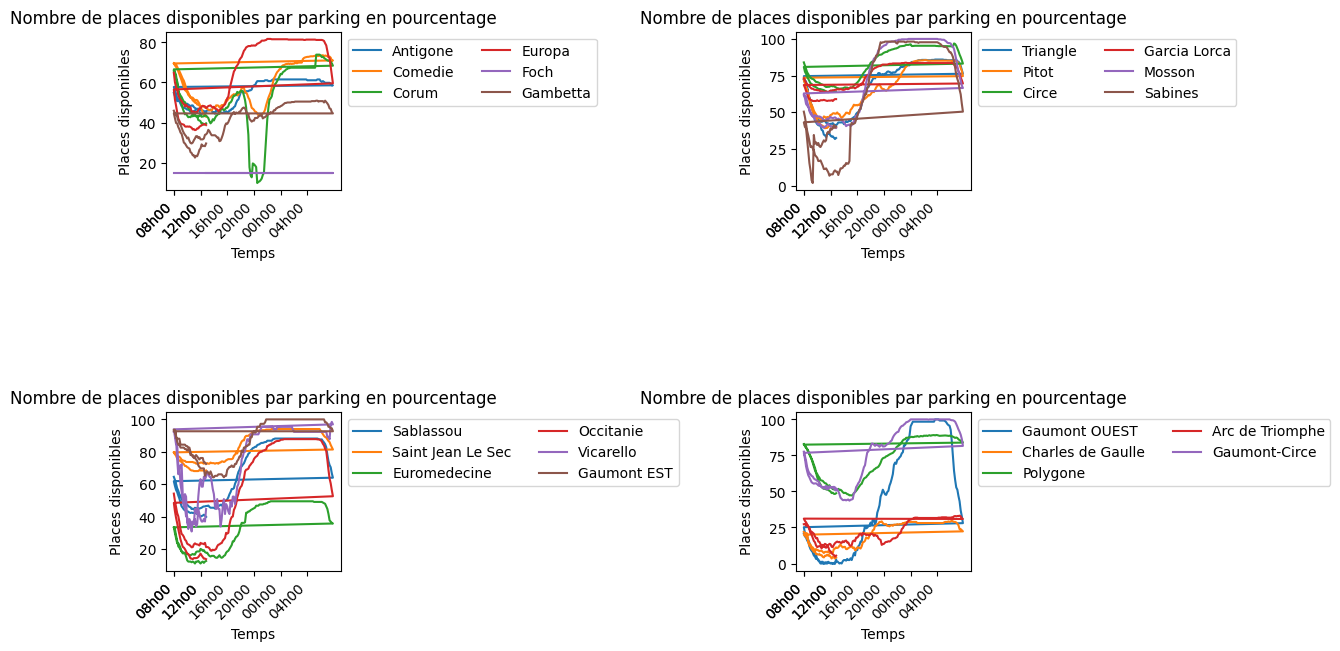

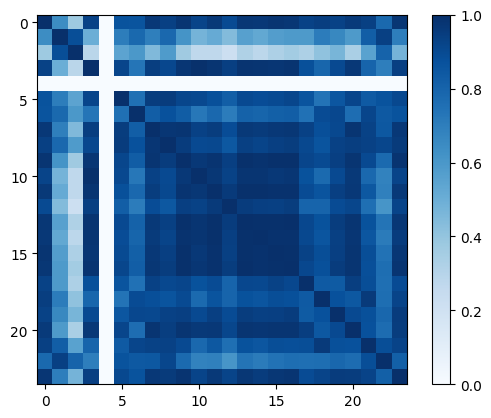

In [32]:
import matplotlib.pyplot as plt
import json 

fichierVoiture = "22.01.8h00.json"

# Ensure the correct path to the data files
with open('../données/Voiture/'+fichierVoiture, 'r') as file:
    data = json.load(file)

with open('../données/Voiture/placeTotal/placeTotalVoiture.json', 'r') as file:
    data3 = json.load(file)

repetition = len(data)
duree = tempsConversion("22.01.8h00", repetition)

# Création de l'image
fig, axs = plt.subplots(3, 4, figsize=(14, 7))  # 3 lignes, 4 colonne

# Premier graphique
axs[0,0].set_title('Nombre de places disponibles par parking en pourcentage')

for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[:6]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[0,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axs[0,0].set_xlabel('Temps')
axs[0,0].set_ylabel('Places disponibles')
axs[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Deuxième graphique

axs[0,3].set_title('Nombre de places disponibles par parking en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[7:13]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[0,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axs[0,3].set_xlabel('Temps')
axs[0,3].set_ylabel('Places disponibles')
axs[0,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Troisième graphique
axs[2,0].set_title('Nombre de places disponibles par parking en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[13:19]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[2,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axs[2,0].set_xlabel('Temps')
axs[2,0].set_ylabel('Places disponibles')
axs[2,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Quatrième graphique
axs[2,3].set_title('Nombre de places disponibles par parking en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[19:25]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[2,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axs[2,3].set_xlabel('Temps')
axs[2,3].set_ylabel('Places disponibles')
axs[2,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)


# appel d'une fonction permettant l'affichage de la durée de la simulation de manière plus lisible
affichageDuree(0,0,24,duree,axs)
affichageDuree(0,3,24,duree,axs)
affichageDuree(2,0,24,duree,axs)
affichageDuree(2,3,24,duree,axs)

# Laisser ligne et colonne vide
fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 2])
fig.delaxes(axs[1, 0])
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
fig.delaxes(axs[1, 3])

# Ajuster la taille du graphique pour laisser de la place à la légende
fig.subplots_adjust(right=0.7)

# Afficher le graphique
plt.show()

# curseur sur la heatmap
MEF(data)



Pour commencer on remarque que le compteur du parking Foch ne doit pas fonctionner correctement car le pourcentage de place libre ne change pas sur une journée et il est identique sur d'autres données récupérées
On peut remarquer que  les parkings ont tendance à se comporter de la même manière à l'exception du parking Corum qui a une chute de sa disponibilité vers 20h. En effet tout les autres parkings ont une chute de leur disponibilité entre 8h et 18h. Cela correspond aux horaires de travail. On peut donc en déduire qu'il s'agit de parkings où les personnes se garent pour aller travailler. Car durant la nuit il y a une disponibilité avoisinent les 80%.